# Import Dependencies

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import classification_report

# Read Data

In [3]:
df = pd.read_csv('clean_review_honkai.csv')
df.head()

,text_akhir,polarity_score,polarity
0,ui berat gamenya framedrop semenjak update par...,-10,negative
1,game bagus terimakasih perbaikan optimalisasin...,4,positive
2,kekurangan minimnya karakter cowok playablecum...,4,positive
3,game bagus mengalami bug mengganggu dimana kar...,-9,negative
4,jaman mihoyo main level valkyrie udah pensi de...,-5,negative


In [4]:
df.shape

(64562, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64562 entries, 0 to 64561
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text_akhir      64562 non-null  object
 1   polarity_score  64562 non-null  int64 
 2   polarity        64562 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

,0
text_akhir,0
polarity_score,0
polarity,0


# Data Exploration

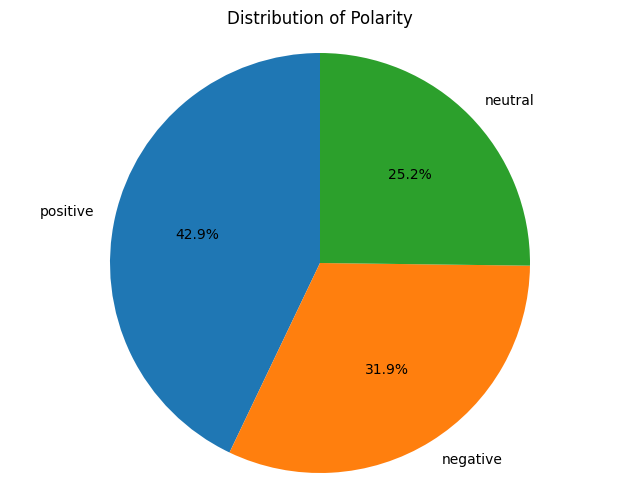

In [7]:
polarity_counts = df['polarity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Polarity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


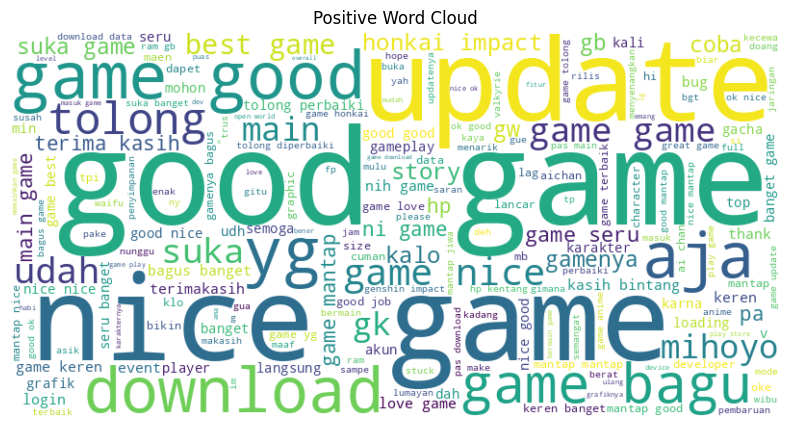

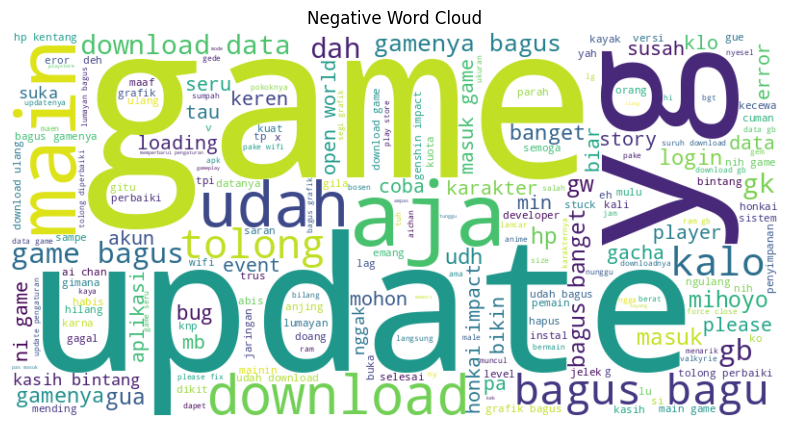

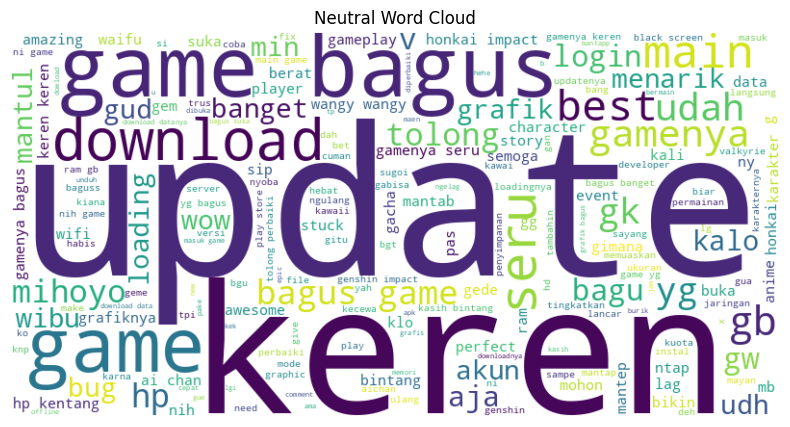

In [8]:
positive_words = ' '.join(df[df['polarity'] == 'positive']['text_akhir'])
negative_words = ' '.join(df[df['polarity'] == 'negative']['text_akhir'])
neutral_words = ' '.join(df[df['polarity'] == 'neutral']['text_akhir'])


# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Word Cloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Word Cloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Word Cloud")
plt.show()

# Modeling

## Preview Skema

|       Algoritma      |      Ekstraksi Fitur     | Pembagian Data |
|:--------------------:|:------------------------:|:--------------:|
|      Naive Bayes     |          TF-IDF          |      80:20     |
|     Random Forest    |          TF-IDF          |      70:30     |
| Deep Learning (LSTM) | Tokenization + Embedding |      80:20     |

## Skema 1 Pelatihan:Naive Bayes  Ekstraksi Fitur: TF-IDF Split Data 80:20

In [9]:
X = df['text_akhir']
y = df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [10]:
#Model Naive Bayes
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7138376348041588
Naive Bayes - accuracy_test: 0.7119956632850616


## Skema 2 Pelatihan:Random Forest  Ekstraksi Fitur: TF-IDF split data 70:20

In [11]:
X = df['text_akhir']
y = df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [12]:
# Membuat dan melatih model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9271789878963557
Random Forest - accuracy_test: 0.8095926480458464


## Skema 3 Pelatihan: DeepLearning(LSTM) Ekstraksi Fitur: Tokenization + Embedding split data 80:20

In [13]:
X = df['text_akhir']
y = df['polarity']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

In [14]:
MAX_VOCAB = 10000  # Jumlah kata unik yang dipertahankan
MAX_LENGTH = 100  # Panjang maksimal setiap input teks

# Tokenisasi teks
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sekuens_train,maxlen=100,padding='post',truncating='post')
padded_test = pad_sequences(sekuens_test,maxlen=100,padding='post',truncating='post')

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
      print("\nAkurasi dan Val Akurasi telah mencapai >92%!")
      self.model.stop_training = True

callback = myCallback()

In [17]:
#Training model
history = model.fit(
    padded_train,
    y_train_one_hot,
    epochs=30,
    validation_data=(padded_test, y_test_one_hot),
    verbose=2,
    callbacks=[callback]
)


Epoch 1/30
1615/1615 - 33s - 20ms/step - accuracy: 0.8719 - loss: 0.3389 - val_accuracy: 0.9349 - val_loss: 0.1883
Epoch 2/30

Akurasi dan Val Akurasi telah mencapai >92%!
1615/1615 - 38s - 24ms/step - accuracy: 0.9518 - loss: 0.1440 - val_accuracy: 0.9472 - val_loss: 0.1629


In [18]:
#Cek akurasi
y_pred_probs = model.predict(padded_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)
print(classification_report(y_true, y_pred, target_names=["Negatif", "Netral", "Positif"]))

404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

     Negatif       0.92      0.97      0.94      4160
      Netral       0.98      0.88      0.93      3224
     Positif       0.96      0.97      0.96      5529

    accuracy                           0.95     12913
   macro avg       0.95      0.94      0.94     12913
weighted avg       0.95      0.95      0.95     12913



## Kesimpulan

Skema 3 memiliki akurasi tertinggi jika dibandingkan dengan skema lain dengan akurasi 95%. Hal ini dikarenakan pada skema 3 menggunakan metode yang lebih kompleks, yaitu menggunakan model DeepLearning khususnya RNN

# Interface

In [19]:
new_texts = ["Makin update kok malah jadi lebih berat gamenya, tai banget", "Update storynya bagus banget, mantap mihoyo", "kapan updatenya min"]
sequences = tokenizer.texts_to_sequences(new_texts)
padded_sequences = pad_sequences(sequences, maxlen=100, padding="post", truncating="post")

In [20]:
# Prediksi kelas (probabilitas output dari softmax)
predictions = model.predict(padded_sequences)

# Konversi ke label kelas (ambil indeks dengan probabilitas tertinggi)
predicted_classes = np.argmax(predictions, axis=1)

# Konversi indeks ke label kelas
final_predictions = label_encoder.inverse_transform(predicted_classes)

print(final_predictions)  # Output: ['positif' 'negatif' 'netral']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
['negative' 'positive' 'neutral']


In [21]:
!pip freeze > requirements.txt